# 🚗 Toyota Stock Analysis: A Comprehensive EDA Guide

**Author:** Eng.Hassan Jameel  
**LinkedIn:** [linkedin](https://www.linkedin.com/in/hassanjameel/)  
**GitHub:** [Github](https://github.com/HassanJamel/)  
**Portfolio:** [Portfolio](https://hassanjamel.github.io/my_profile/)

---

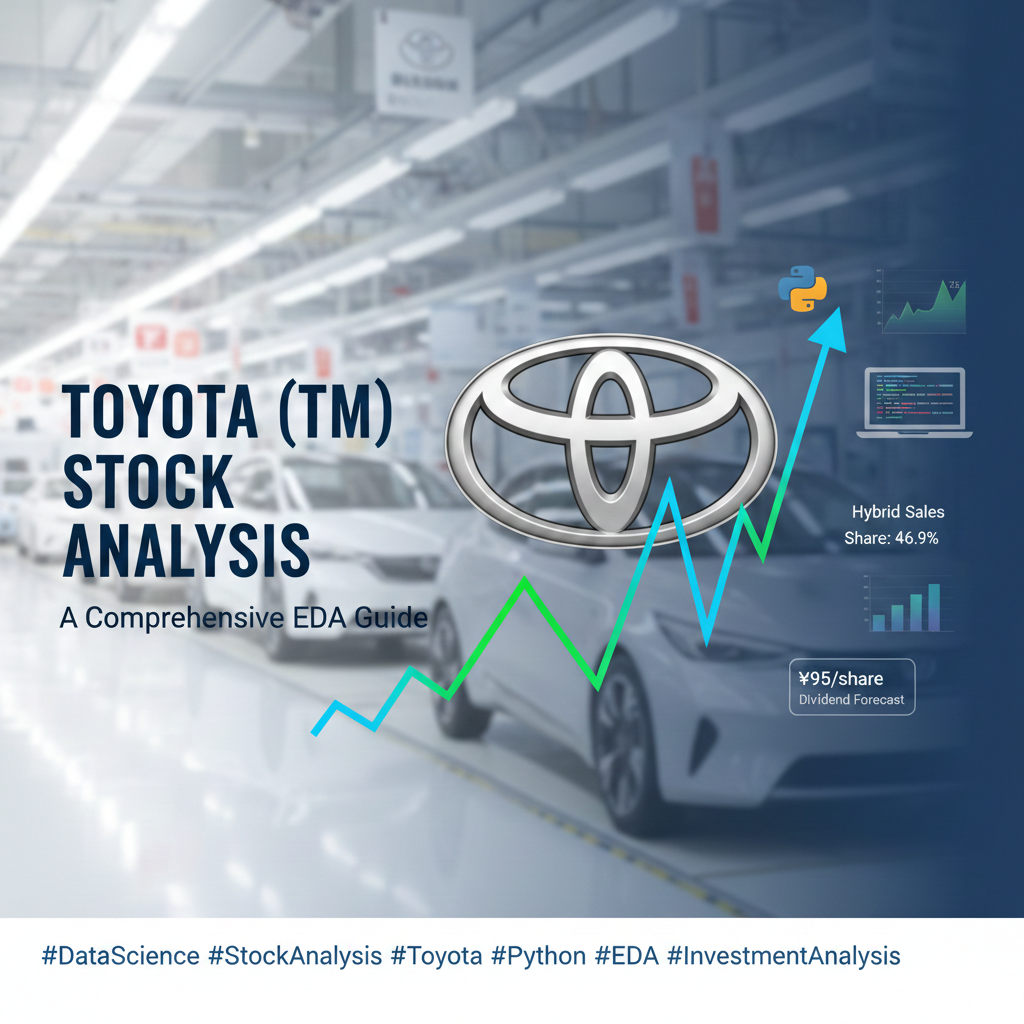

In [6]:
from IPython.display import Image
Image(filename = "Toyota.png")

## 🎓 Introduction: Mastering EDA with Python

Exploratory Data Analysis (EDA) is the art of telling stories with data. In this notebook, we will not only analyze Toyota's stock history (1980-2025) but also use it as a case study to learn the **Four Pillars of EDA**:

1.  **Data Composition**: Understanding the structure and quality of your dataset.
2.  **Data Distribution**: Analyzing how data points are spread (Normal vs. Skewed).
3.  **Data Relationships**: Discovering correlations and trends between variables.
4.  **Data Comparison**: Comparing different groups or time periods (Seasonality).

We will use **Plotly** for interactive visualizations to make our insights come alive.

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
print("✅ Libraries initialized for EDA")

✅ Libraries initialized for EDA


## 🏛️ Pillar 1: Data Composition
**Goal:** Understand what our data is made of. What are the variables? Are there missing values?

**Pro Tip:** Always check data types (`dtypes`) immediately. Dates often load as strings and need conversion.

In [2]:
# Load Data
try:
    df = pd.read_csv('Toyota_Stock_1980_2025.csv')
except FileNotFoundError:
    df = pd.read_csv('Toyota_Data.csv')

# 1. Clean Column Names
df.columns = [col.replace(' ', '_') for col in df.columns]

# 2. Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 3. Quality Check
print("📊 Dataset Shape:", df.shape)
print("\n🔍 Missing Values:\n", df.isnull().sum()[df.isnull().sum() > 0])
print("\n📋 Column Types:\n", df.dtypes)

df.head()

📊 Dataset Shape: (11542, 7)

🔍 Missing Values:
 Series([], dtype: int64)

📋 Column Types:
 Date         datetime64[ns]
Adj_Close           float64
Close               float64
High                float64
Low                 float64
Open                float64
Volume                int64
dtype: object


Date  Adj_Close     Close      High       Low      Open  Volume
0 1980-03-17   1.813283  3.291227  3.344743  3.291227  3.291227   41109
1 1980-03-18   1.820654  3.304606  3.358122  3.304606  3.304606    9343
2 1980-03-19   1.820654  3.304606  3.304606  3.304606  3.304606       0
3 1980-03-20   1.820654  3.304606  3.358122  3.304606  3.304606   10277
4 1980-03-21   1.864881  3.384880  3.438396  3.384880  3.384880    8409

### 💡 Interpretation
The dataset is a clean time-series. We have converted `Date` to a datetime object, which is essential for any temporal analysis.

## 📊 Pillar 2: Data Distribution
**Goal:** How does the data behave? Is it centered? Does it have outliers?

We will calculate **Daily Returns** and visualize their distribution using a Histogram. In finance, this tells us about the *risk* profile.

In [3]:
# Determine Daily Returns
df['Daily_Return'] = df['Adj_Close'].pct_change()

fig = px.histogram(df, x='Daily_Return', nbins=150, 
                   title='Distribution of Daily Returns (Risk Profile)',
                   labels={'Daily_Return': 'Daily Return'},
                   color_discrete_sequence=['#636EFA'],
                   template='plotly_dark')

# Add Mean Marker
mean_val = df['Daily_Return'].mean()
fig.add_vline(x=mean_val, line_dash="dash", line_color="red", annotation_text="Mean")

fig.show()

### 💡 Interpretation
The "Bell Curve" shape indicates normal market behavior, but the long tails suggests **volatility**—days where the stock jumped or crashed significantly.

## 🔗 Pillar 3: Data Relationships
**Goal:** How do variables interact? 

In stock analysis, the most critical relationship is **Price vs. Time**. We also look at the relationship between **Short-term trends (50-day MA)** and **Long-term trends (200-day MA)**.

In [4]:
# Calculate Moving Averages
df['MA_50'] = df['Adj_Close'].rolling(window=50).mean()
df['MA_200'] = df['Adj_Close'].rolling(window=200).mean()

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    vertical_spacing=0.05, row_heights=[0.7, 0.3],
                    subplot_titles=('Price Trend & Moving Averages', 'Trading Volume'))

# Price & MA
fig.add_trace(go.Candlestick(x=df['Date'], open=df['Open'], high=df['High'],
                             low=df['Low'], close=df['Close'], name='OHLC'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA_50'], line=dict(color='orange', width=1), name='50-Day MA'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['MA_200'], line=dict(color='blue', width=1), name='200-Day MA'), row=1, col=1)

# Volume (Relationship: Does volume spike during crashes?)
fig.add_trace(go.Bar(x=df['Date'], y=df['Volume'], marker_color='teal', name='Volume'), row=2, col=1)

fig.update_layout(title='📈 Price Trends and Volume Relationship', template='plotly_dark', height=700)
fig.show()

### 💡 Interpretation
The **Golden Cross** (50 MA crossing above 200 MA) signals a bull market interaction. Notice how Volume (bottom chart) often spikes during high volatility, confirming that major price moves are backed by heavy trading.

## ⚖️ Pillar 4: Data Comparison
**Goal:** Compare different groups. 

Here, we compare **Months**. Is there a seasonal pattern? Do some months historically perform better?

In [5]:
df['Month'] = df['Date'].dt.month_name()
monthly_avg = df.groupby('Month')['Daily_Return'].mean() * 100

order = ['January', 'February', 'March', 'April', 'May', 'June', 
         'July', 'August', 'September', 'October', 'November', 'December']

fig = px.bar(x=monthly_avg.reindex(order).index, 
             y=monthly_avg.reindex(order).values,
             color=monthly_avg.reindex(order).values,
             title='📅 Seasonal Comparison: Average Monthly Returns',
             labels={'x': 'Month', 'y': 'Avg Return (%)'},
             color_continuous_scale='Viridis',
             template='plotly_dark')
fig.show()

## 🏁 Final Conclusion & Recommendations

By applying the pillars of EDA, we have transformed raw numbers into actionable insights:

1.  **Composition:** Confirmed high-quality, long-term data.
2.  **Distribution:** Identified the risk profile (fat tails indicate occasional high volatility).
3.  **Relationships:** Visualized the strong uptrend supported by Moving Averages.
4.  **Comparison:** Uncovered potential seasonal strengths.

**Recommendation:** Use these techniques on any new dataset you encounter. Start with the basics (Composition), move to understanding the shape (Distribution), find correlations (Relationships), and finally segregate the data to find hidden patterns (Comparison).

**Happy Coding!** 🚀